> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# No Show Appointments - Project

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
	
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
What is the proportional between the showed up and not showed up appointmnets?
what is the Relation between Time between the scheduled day and appointment day to the attendance of people ?

In [40]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

checking for cleanliness, and then trim and clean the dataset for analysis


### General Properties
Explore the general properties of the data frame after loading the data set

In [41]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [42]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


## Check data
Check if the dataframe contains duplicated rows or null value and drop them if exist


In [43]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


### Data Cleaning
After checking the data we conclude that we need some cleanig of data to make it able and easier to use
 

In [46]:
## Rename Columns to be all lower and add "_" as separetor

df.rename(columns = lambda x: x.strip().lower().replace("-","_"), inplace = True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [47]:
## Check if there is a zero or negative number in the column of age and replace it with the mean value of age 
## to be used in analysis

mean_age = df.age.mean()
df[df['age'] <=0 ] = mean_age


In [48]:
## Convert the data type of the 'scheduledday' and 'appointmentday' columns from string to date time 
## to be used in analysis

df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df["scheduledday"] = df["scheduledday"].dt.date
df["appointmentday"] = df["appointmentday"].dt.date


In [49]:
## Convert the data type of the 'no_show' column to be 0 and 1 instead of 'yes' and 'no' similar to other columns

df.no_show[df["no_show"]== 'No'] = 0
df.no_show[df["no_show"]== 'Yes'] = 1
df.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903.0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5.589978e+14,5642503.0,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.262962e+12,5642549.0,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8.679512e+11,5642828.0,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0
4,8.841186e+12,5642494.0,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0


In [50]:
## Create new column for showed and not showed status to be easier to use in analysis

showed_up = df['no_show'] == 0
not_showed_up = df['no_show'] == 1
df['showed_up'] = showed_up
df['not_showed_up'] = not_showed_up

In [51]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,showed_up,not_showed_up
0,2.987250e+13,5642903.0,F,2016-04-29,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,True,False
1,5.589978e+14,5642503.0,M,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
2,4.262962e+12,5642549.0,F,2016-04-29,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
3,8.679512e+11,5642828.0,F,2016-04-29,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
4,8.841186e+12,5642494.0,F,2016-04-29,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,True,False


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 ( proportional between showed and not showed up appointments)

In [52]:
## Calculate the precentage for the showed and not showed up appointments and begin to calculate the relation between them
## and plot the result to be visualized and more clear

show_counts = df.groupby('showed_up').count()['patientid']
total_counts = show_counts[0] + show_counts[1]
show_counts

showed_up
False    25220
True     85307
Name: patientid, dtype: int64

In [53]:
showed_up_precentage = show_counts[1] / total_counts
not_showed_up_precentage = show_counts[0] / total_counts

In [54]:
print("Precentage of the showed up appointment=", f"{showed_up_precentage:.0%}")
print("Precentage of the showed up appointment=", f"{not_showed_up_precentage:.0%}")

Precentage of the showed up appointment= 77%
Precentage of the showed up appointment= 23%


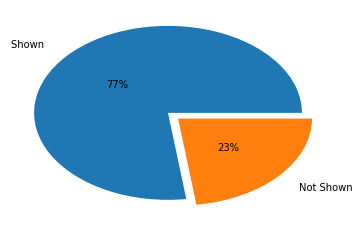

In [55]:
pie_variables = np.array([showed_up_precentage,not_showed_up_precentage])

plt.pie(pie_variables, labels = ["Shown ","Not Shown"], explode = [0.1, 0] , autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2);

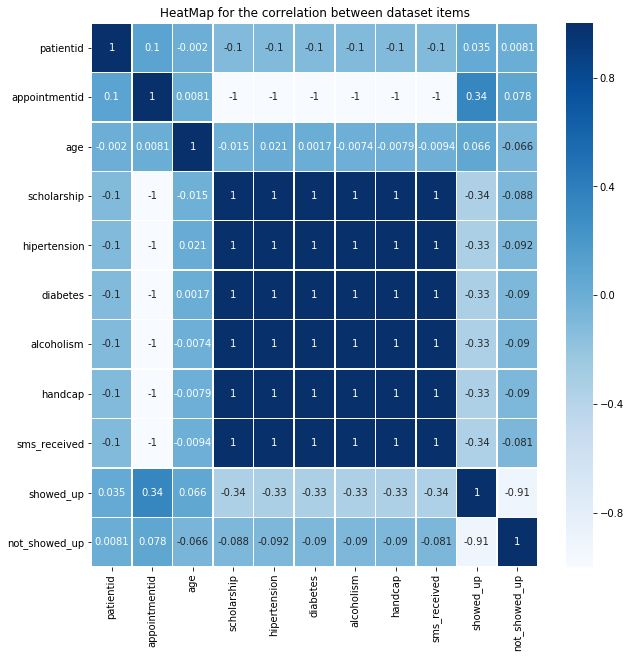

In [56]:
df_corr = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(df_corr,cmap='Blues',linewidths=0.5, annot=True)
plt.title("HeatMap for the correlation between dataset items");


In [57]:
def plot_his(column1,column2,label):
    plt.bar(["Showed up","Not Showed up"],[column1,column2], color=("green","red"))
    plt.title("Showed up and Not showed up Precentage")
    plt.xlabel("Appointment")
    plt.ylabel(label);

### Research Question 2  (Relation between all factors and people who attend the appointment)

In [58]:
## Calculate the relation between the factors that affect the attendance of the appointments then plot the results to be
## visualized and more clear

### 01_Age ###
mean_age_showed = float(df.age[showed_up].mean())
mean_age_not_showed = float(df.age[not_showed_up].mean())

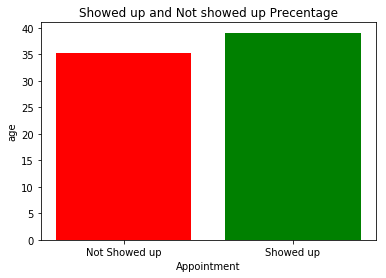

In [59]:
plot_his(mean_age_showed,mean_age_not_showed,"age")


In [60]:
print("mean age for the people who Showed up the appiontmnets = ",round(mean_age_showed, 2))
print("mean age for the people who Not Showed up the appiontmnets = ",round(mean_age_not_showed, 2))

mean age for the people who Showed up the appiontmnets =  39.08
mean age for the people who Not Showed up the appiontmnets =  35.33


In [61]:
### 02_scholarship ###
precentage_scholarship_showed = float(df.groupby('scholarship')['showed_up'].mean()[0])
precentage_scholarship_not_showed = float(df.groupby('scholarship')['showed_up'].mean()[1])

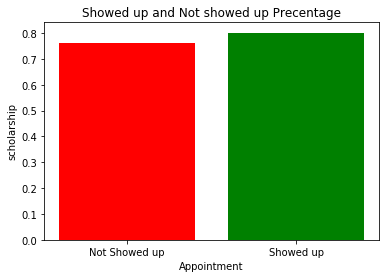

In [62]:
plot_his(precentage_scholarship_showed,precentage_scholarship_not_showed,"scholarship")

In [63]:
print("Precentage of showed up for the people who have scholarship = ",round(precentage_scholarship_showed, 3))
print("Precentage of not showed up for the people who have scholarship = ",round(precentage_scholarship_not_showed, 3))

Precentage of showed up for the people who have scholarship =  0.801
Precentage of not showed up for the people who have scholarship =  0.762


In [64]:
### 03_hipertension ###
precentage_hipertension_showed = float(df.groupby('hipertension')['showed_up'].mean()[0])
precentage_hipertension_not_showed = float(df.groupby('hipertension')['showed_up'].mean()[1])

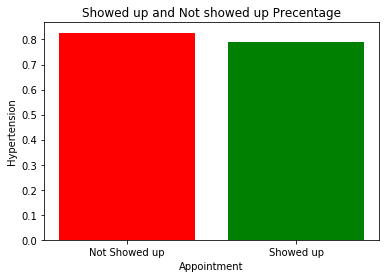

In [65]:
plot_his(precentage_hipertension_showed,precentage_hipertension_not_showed,"Hypertension")

In [66]:
print("Precentage of showed up for the people who have hipertension = ",round(precentage_hipertension_showed, 3))
print("Precentage of not showed up for the people who have hipertension = ",round(precentage_hipertension_not_showed, 3))

Precentage of showed up for the people who have hipertension =  0.79
Precentage of not showed up for the people who have hipertension =  0.827


In [67]:
### 04_alcoholism ###
precentage_alcoholism_showed = float(df.groupby('alcoholism')['showed_up'].mean()[0])
precentage_alcoholism_not_showed = float(df.groupby('alcoholism')['showed_up'].mean()[1])

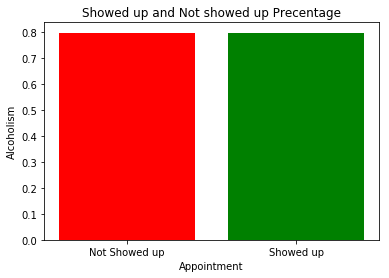

In [68]:
plot_his(precentage_alcoholism_showed,precentage_alcoholism_not_showed,"Alcoholism")

In [69]:
print("Precentage of showed up for the people who has alcoholism = ",round(precentage_alcoholism_showed, 3))
print("Precentage of not showed up for the people who has alcoholism = ",round(precentage_alcoholism_not_showed, 3))

Precentage of showed up for the people who has alcoholism =  0.797
Precentage of not showed up for the people who has alcoholism =  0.799


In [70]:
### 05_diabetes###
precentage_diabetes_showed = float(df.groupby('diabetes')['showed_up'].mean()[0])
precentage_diabetes_not_showed = float(df.groupby('diabetes')['showed_up'].mean()[1])

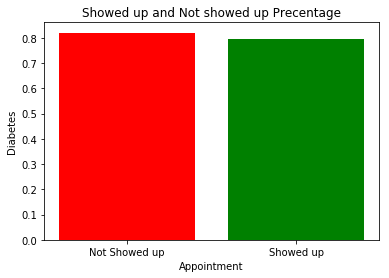

In [71]:
plot_his(precentage_diabetes_showed,precentage_diabetes_not_showed,"Diabetes")

In [72]:
print("Precentage of showed up for the people who have diabetes = ",round(precentage_diabetes_showed, 3))
print("Precentage of not showed up for the people who have diabetes = ",round(precentage_diabetes_not_showed, 3))

Precentage of showed up for the people who have diabetes =  0.796
Precentage of not showed up for the people who have diabetes =  0.82


In [73]:
### 06_handicap ###
precentage_handcap_showed = float(df.groupby('handcap')['showed_up'].mean()[0])
precentage_handcap_not_showed = float(df.groupby('handcap')['showed_up'].mean()[1])

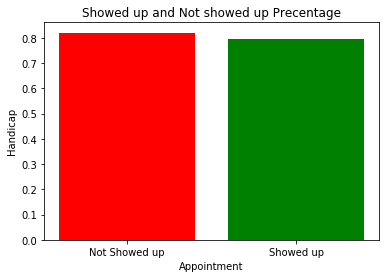

In [74]:
plot_his(precentage_handcap_showed,precentage_handcap_not_showed,"Handicap")

In [75]:
print("Precentage of showed up for the Handicapped people  = ",round(precentage_handcap_showed, 3))
print("Precentage of not showed up for the Handicapped people = ",round(precentage_handcap_not_showed, 3))

Precentage of showed up for the Handicapped people  =  0.797
Precentage of not showed up for the Handicapped people =  0.821


In [76]:
### 07_sms_received ###
precentage_sms_received_showed = float(df.groupby('sms_received')['showed_up'].mean()[0])
precentage_sms_received_not_showed = float(df.groupby('sms_received')['showed_up'].mean()[1])

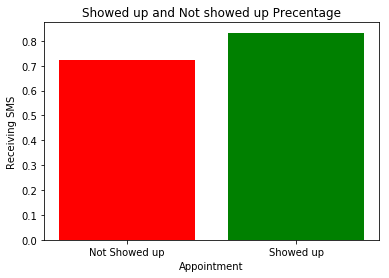

In [77]:
plot_his(precentage_sms_received_showed,precentage_sms_received_not_showed,"Receiving SMS")

In [78]:
print("Precentage of showed up and Receiving SMS  = ",round(precentage_sms_received_showed, 3))
print("Precentage of not showed up and Receiving SMS = ",round(precentage_sms_received_not_showed, 3))

Precentage of showed up and Receiving SMS  =  0.833
Precentage of not showed up and Receiving SMS =  0.723


### Research Question 3  (Relation between Time between the scheduled day and appointment day to the attendance of people)

In [79]:
## Create a new column for the diffrence between the date of scheduling and the date of appointment, then calculate the
## relation between the diffrence in time and the attendance of the appointment

In [80]:
df["date_diff"] = df["appointmentday"] - df["scheduledday"]
mean_date_diff_showed = int(str(df.date_diff[showed_up].mean())[:2])
mean_date_diff_not_showed = int(str(df.date_diff[not_showed_up].mean())[:2])

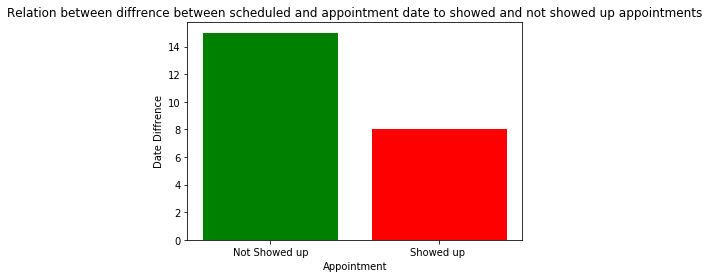

In [81]:
plt.bar(["Showed up ","Not Showed up"],[mean_date_diff_showed,mean_date_diff_not_showed],color = ("red","green"))
plt.title("Relation between diffrence between scheduled and appointment date to showed and not showed up appointments")
plt.xlabel("Appointment")
plt.ylabel("Date Diffrence");

In [82]:
print("mean days before appointments for people who Showed up the appiontmnets = ",mean_date_diff_showed," days")
print("mean days before appointments for people who Not Showed up the appiontmnets = ",mean_date_diff_not_showed," days")

mean days before appointments for people who Showed up the appiontmnets =  8  days
mean days before appointments for people who Not Showed up the appiontmnets =  15  days



## Conclusions

-There is a big precentage of people didnt show up their appointments with precentage 23%
-The age has a big effect on the attendance as the older people showed up more than the younger people, the mean of the showed
 up people is 39.08 while the mean of the not showed is 35.33
-sending SMS before the appiontment is not neccessary the right option to make sure that the patient will come, as the not showed patiens 72% of them have received SMS
-The people who have scholarship have higher precentage of missing the appointment with 76% 
-the alcoholism is not a factor that affect the attendance of patiens or not
-the people who scheduled the appointments earlier misses the appointments more than the others though they receive SMS.

### Limitations
-Missing some data about the distance of travel, The dataset contains column for neighbourhood but it is not useful in the exploration.
The distance between the location of patient and the location of appointment can be more useful.



In [83]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0